In [114]:
import pandas as pd
import numpy as np

In [115]:
fips = '36061'

In [116]:
# Cleaning and retrieving mobility data

mob = pd.read_csv('applemobilitydata/applemobilitycleaned_county.csv')
mob = mob.loc[mob['fips'] == float(fips)]
cols = [0,2,3]
mob = mob.drop(mob.columns[cols], axis=1)

In [117]:
# Cleaning and retrieving symptoms data

sym = pd.read_csv('covidsymptoms/covidsymptoms_google.csv')
sym = sym.loc[sym['fips'] == float(fips)]
cols = [0,2,3]
sym = sym.drop(sym.columns[cols], axis=1)

In [118]:
# Cleaning and retrieving demographics data

dem = pd.read_csv('countydemographics/county_demographics.csv')
dem = dem.loc[dem['fips'] == float(fips)]
cols = [0,2,3,4,5,6,9,10,11]
dem = dem.drop(dem.columns[cols], axis=1)

In [119]:
# Cleaning and retrieving testing rate data

tes = pd.read_csv('testingrates/testing_rates_county.csv')
tes = tes.loc[tes['fips'] == float(fips)]
cols = [0]
tes = tes.drop(tes.columns[cols], axis=1)

In [120]:
# Cleaning and retrieving case data

cas = pd.read_csv('covidstats/confirmed_cases_county.csv')
cas = cas.loc[cas['fips'] == float(fips)]
cols = [0]
cas = cas.drop(cas.columns[cols], axis=1)

In [121]:
newX = pd.concat([mob,sym])
newX = newX.reset_index()
newX = newX.drop(newX.columns[[0,1]], axis=1)

newY = pd.concat([cas])
newY = newY.reset_index()
newY = newY.drop(newY.columns[[0,1]], axis=1)

In [122]:
newX = newX.T
newY = newY.T
newX = newX.fillna(0)
newY = newY.fillna(0)

In [123]:
X = newX[[0,1]]
y = newY[[0]]

In [124]:
# Moving averages

X[0] = X[0].rolling(window=14).mean().dropna()
X[1] = X[1].rolling(window=9).mean().dropna()

#y[1] = y[1].shift(14).dropna()
X = X[X.index.isin(y.index)]
y = y[y.index.isin(X.index)]
X = X.fillna(0)
y = y.fillna(0)

In [125]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics

In [126]:
# Linear Regression

In [127]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

model = regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

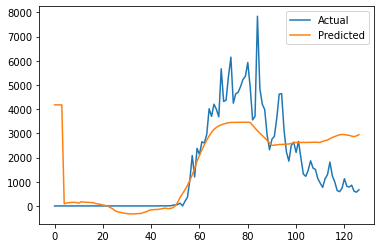

In [128]:
y_pred = regressor.predict(X)
df = pd.DataFrame({'Actual': y.to_numpy().flatten(), 'Predicted': y_pred.flatten()})
df.plot()

In [129]:
# Gaussian Process Regression

In [130]:
import sklearn.gaussian_process as gp
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
regressor = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
model = regressor.fit(X_train, y_train)

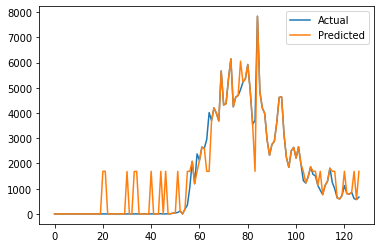

In [131]:
y_pred = regressor.predict(X)
df = pd.DataFrame({'Actual': y.to_numpy().flatten(), 'Predicted': y_pred.flatten()})
df.plot()

In [132]:
# Decision Tree Regression

In [133]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
model = regressor.fit(X_train, y_train)

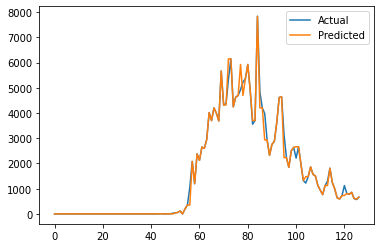

In [134]:
y_pred = regressor.predict(X)
df = pd.DataFrame({'Actual': y.to_numpy().flatten(), 'Predicted': y_pred.flatten()})
df.plot()

In [135]:
# SVR Gaussian

In [136]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

regressor = SVR(kernel='rbf')
X = StandardScaler().fit_transform(X)
y = StandardScaler().fit_transform(y)
y = np.reshape(y, (y.shape[0],))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
model = regressor.fit(X_train, y_train)

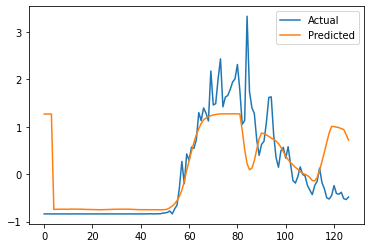

In [137]:
y_pred = regressor.predict(X)
df = pd.DataFrame({'Actual': y.flatten(), 'Predicted': y_pred.flatten()})
df.plot()